In [1]:
# ignore warnings

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
import numpy as np
import pandas as pd

In [6]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

file_path = 'asdf_single_space_log.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f', 'None']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)
df.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.751972,0.190719,-0.000040,0.665449,0.224061,-0.052495,0.620955,0.278370,-0.106833,0.596607,...,0.562276,-0.170758,0.789918,0.611925,-0.175689,0,0,0,0,NaN
1,0.751872,0.191413,-0.000044,0.665630,0.224076,-0.052848,0.621325,0.278716,-0.107101,0.597084,...,0.563556,-0.171653,0.788661,0.613057,-0.176105,0,0,0,0,NaN
2,0.751532,0.191176,-0.000035,0.664815,0.224552,-0.053619,0.620948,0.278724,-0.108520,0.597350,...,0.562891,-0.174294,0.788651,0.612437,-0.179876,0,0,0,0,NaN
3,0.750785,0.192432,-0.000032,0.664394,0.224349,-0.054367,0.620833,0.277041,-0.109724,0.597407,...,0.561866,-0.171563,0.787544,0.610522,-0.176299,0,0,0,0,NaN
4,0.751267,0.191151,-0.000027,0.664975,0.224834,-0.051207,0.621095,0.279007,-0.103967,0.598054,...,0.558485,-0.162821,0.789547,0.607738,-0.166901,0,0,0,0,NaN


In [4]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    df['None'].iloc[row] = 1
    for value in df[y_names_origin].iloc[row]:
        if value == 1:
            df['None'].iloc[row] = 0
            break

In [5]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

import sys, os
sys.path.append(os.pardir)

from visualization.smoother import gamma_smoothing, average_smoothing

df = gamma_smoothing(df)  # takes about 1 min
# df = average_smoothing(df)
df.head()

In [7]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# normalization, about 1 min

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in x_names:
	df_column = df[column]
	df_column = df_column.values.reshape(-1, 1)
	df_column = scaler.fit_transform(df_column)

	for row in range(len(df)):
		df[column].iloc[row] = df_column[row]


In [49]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# 원본 데이터 전처리 한 것 csv 로 저장

import pandas as pd
from pandas import DataFrame

df.to_csv("asdf_single_space_log_preprocessing.csv", sep=",", index=False, header=False)

In [3]:
# asdf_single_space_log_preprocessing.csv를 이용해 전처리 과정 스킵하고 바로 불러오기

file_path = 'asdf_single_space_log_preprocessing.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f', 'None']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)
df.head()


,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.494838,0.656358,0.644003,0.255411,0.459331,0.329694,0.208499,0.243378,0.305565,0.232495,...,0.729679,0.333785,0.565661,0.778862,0.351583,0,0,0,0,1.0
1,0.494196,0.659620,0.634391,0.255973,0.459400,0.328056,0.209497,0.244448,0.304720,0.233774,...,0.734537,0.331900,0.562953,0.783144,0.350812,0,0,0,0,1.0
2,0.491627,0.660463,0.650251,0.253780,0.461632,0.323494,0.209079,0.245115,0.299736,0.235253,...,0.734928,0.325206,0.561306,0.783368,0.343355,0,0,0,0,1.0
3,0.485287,0.666871,0.666975,0.251156,0.462037,0.317285,0.208518,0.240311,0.292949,0.236294,...,0.731272,0.326942,0.557933,0.776259,0.345515,0,0,0,0,1.0
4,0.484579,0.664696,0.689025,0.251386,0.464513,0.328227,0.208888,0.243508,0.307035,0.238652,...,0.716246,0.346398,0.560225,0.761463,0.364241,0,0,0,0,1.0


In [4]:
# x, y split
x, y = df[x_names], df[y_names]

In [5]:
# train, test split
train_test_ratio = 0.95

train_num = int(len(df) * 0.95)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

# train_test_ratio = 0.2

# train_num = int(len(df) * 0.2)

# x_train, x_test = x[train_num:], x[:train_num]
# y_train, y_test = y[train_num:], y[:train_num]

In [21]:
# apply mlp

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(63,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [22]:
model.fit(x_train, y_train, epochs=140)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/140
535/535 [==============================] - 1s 940us/step - loss: 1.0124 - accuracy: 0.6270
Epoch 2/140
535/535 [==============================] - 0s 875us/step - loss: 0.7385 - accuracy: 0.7239
Epoch 3/140
535/535 [==============================] - 0s 770us/step - loss: 0.6426 - accuracy: 0.7498
Epoch 4/140
535/535 [==============================] - 0s 773us/step - loss: 0.5833 - accuracy: 0.7671
Epoch 5/140
535/535 [==============================] - 0s 713us/step - loss: 0.5460 - accuracy: 0.7797
Epoch 6/140
535/535 [==============================] - 0s 753us/step - loss: 0.5193 - accuracy: 0.7887
Epoch 7/140
535/535 [==============================] - 0s 676us/step - loss: 0.5000 - accuracy: 0.7989
Epoch 8/140
535/535 [==============================] - 0s 661us/step - loss: 0.4857 - accuracy: 0.8076
Epoch 9/140
535/535 [==============================] - 0s 657us/step - loss: 0.4751 - accuracy: 0.8131
Epoch 10/140
535/535 [==============================] - 0s 699us/step - l

[0.7148684859275818, 0.8013318777084351]

In [23]:
predict = model.predict(x_test)

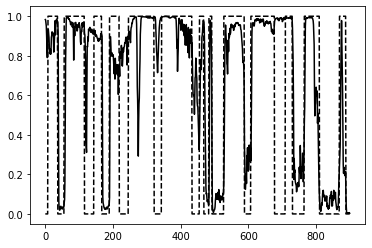

In [24]:
import matplotlib.pyplot as plt

size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

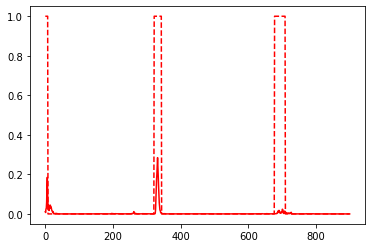

In [25]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')


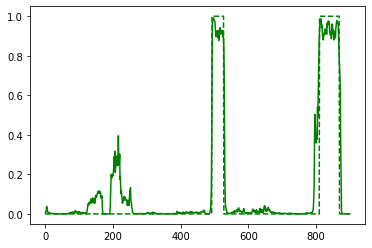

In [26]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

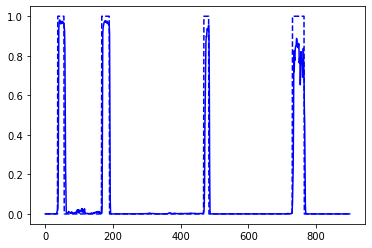

In [27]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

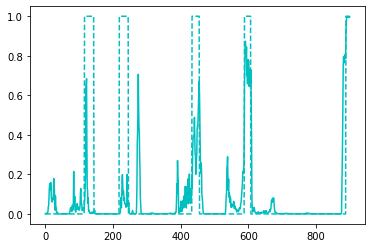

In [28]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')

In [29]:
def up_sensivity(data, sensivity=2):

    denominator = (sensivity * sum(data) - (sensivity - 1)* data[4])
    
    data[0], data[1], data[2], data[3], data[4] = (
    sensivity * data[0] / denominator,
    sensivity * data[1] / denominator,
    sensivity * data[2] / denominator,
    sensivity * data[3] / denominator,
    data[4] / denominator
    )

    return data
    

In [30]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 3)

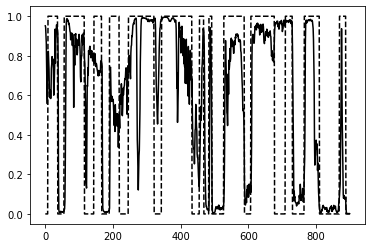

In [31]:
plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

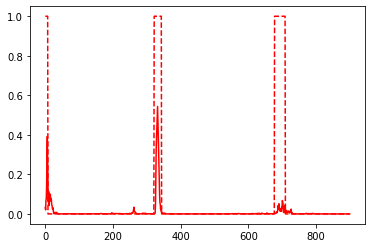

In [32]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')

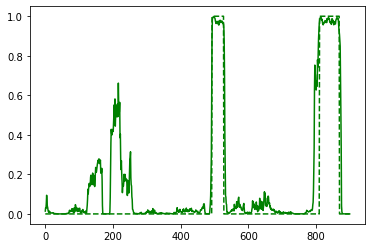

In [33]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

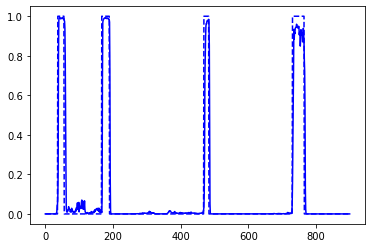

In [34]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

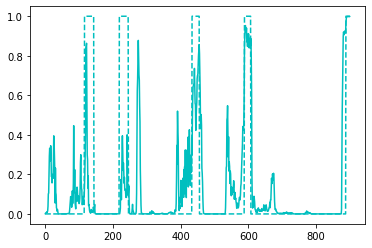

In [35]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')